In [121]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import tensorflow.keras  as keras
import seaborn           as sns
import os

from tqdm                          import tqdm
from keras.preprocessing.image     import ImageDataGenerator
from sklearn.preprocessing         import label_binarize
from sklearn.metrics               import confusion_matrix
from sklearn.model_selection       import train_test_split
from keras.models                  import Sequential
from keras.layers                  import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers              import Adam

In [122]:
model = Sequential()

In [123]:
model.add(Conv2D(filters = 32, kernel_size = 3, strides = 1, input_shape= (150, 150, 3), activation = "relu"))

In [124]:
model.add(MaxPool2D(pool_size = (2, 2)))

In [125]:
model.add(Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = "relu"))

In [126]:
model.add(MaxPool2D(pool_size = (2, 2)))

In [127]:
model.add(Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = "relu"))

In [128]:
model.add(MaxPool2D(pool_size = (2, 2)))

In [129]:
model.add(Conv2D(filters = 128, kernel_size = 3, strides = 1, activation = "relu"))

In [130]:
model.add(MaxPool2D(pool_size = (2, 2)))

In [131]:
model.add(Conv2D(filters = 256, kernel_size = 3, strides = 1, activation = "relu"))

In [132]:
model.add(MaxPool2D(pool_size = (2, 2)))

In [133]:
model.add(Flatten())

In [134]:
model.add(Dense(units = 128, activation = "relu"))

In [135]:
model.add(Dense(units = 128, activation = "relu"))

In [136]:
model.add(Dense(units = 128, activation = "relu"))

In [137]:
model.add(Dropout(0.3))

In [142]:
model.add(Dense(units = 1, activation = "sigmoid"))

In [143]:
model.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [144]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [145]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [146]:
training_set = train_datagen.flow_from_directory('/Users/mehdi/Downloads/chest_xray/train', target_size=(150, 150), batch_size=32, class_mode='binary')

Found 5216 images belonging to 2 classes.


In [147]:
test_set = test_datagen.flow_from_directory('/Users/mehdi/Downloads/chest_xray/test', target_size=(150, 150), batch_size=32, class_mode='binary')

Found 624 images belonging to 2 classes.


In [148]:
model.fit_generator(training_set, steps_per_epoch=130, epochs=30, validation_data=test_set, validation_steps=63)

/var/folders/vq/2jh0178d4xd_d_tfhk0lt_mh0000gn/T/ipykernel_77445/624441091.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(training_set, steps_per_epoch=130, epochs=30, validation_data=test_set, validation_steps=63)


Epoch 1/30
130/130 [==============================] - 89s 676ms/step - loss: 0.5747 - accuracy: 0.7433 - val_loss: 0.6801 - val_accuracy: 0.6250
Epoch 2/30
130/130 [==============================] - 82s 629ms/step - loss: 0.5649 - accuracy: 0.7493
Epoch 3/30
130/130 [==============================] - 83s 639ms/step - loss: 0.5669 - accuracy: 0.7462
Epoch 4/30
130/130 [==============================] - 81s 625ms/step - loss: 0.5687 - accuracy: 0.7442
Epoch 5/30
130/130 [==============================] - 82s 628ms/step - loss: 0.5740 - accuracy: 0.7392
Epoch 6/30
130/130 [==============================] - 81s 623ms/step - loss: 0.5684 - accuracy: 0.7445
Epoch 7/30
130/130 [==============================] - 82s 629ms/step - loss: 0.5658 - accuracy: 0.7469
Epoch 8/30
130/130 [==============================] - 81s 620ms/step - loss: 0.5715 - accuracy: 0.7416
Epoch 9/30
130/130 [==============================] - 81s 622ms/step - loss: 0.5694 - accuracy: 0.7435
Epoch 10/30
130/130 [==========

In [149]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 17, 17, 64)      

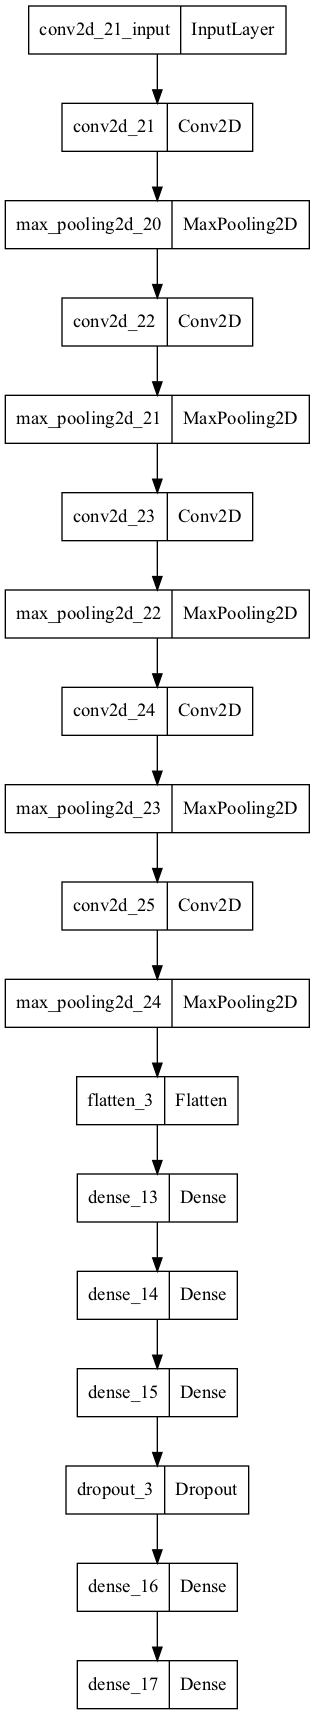

In [150]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [69]:
model.save("Pneumonia_Prediction.h5")

In [70]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [71]:
test_image = keras.utils.load_img("/Users/mehdi/Downloads/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg", target_size=(150,150))

In [74]:
result = model.predict(test_image)
result = np.squeeze(result)

ValueError: Failed to find data adapter that can handle input: <class 'PIL.Image.Image'>, <class 'NoneType'>

In [33]:
if result [0][0] == 1:
    prediction = "Pneumonia"
else: 
    prediction = "normal"

NameError: name 'result' is not defined